In [1]:
from build_DS import find_governing_equations
from get_vector_field import get_equation
import numpy as np

In [2]:
dim = 3
# bounds = [1.6, 4]
bounds = [0.5, 0.5, 0.5]
# n_x, n_y
tol = 1e-1
# act = 'elu'
eq = 'van_der_pool_2d'
eq = 'cpa_3d'
vf = get_equation(eq)
# time series hyperparameters
dt = 0.1
# init= [0, 1]
t_end = 20
freq = 5
deg = 5
lamda = 0.1
n_traj = 100
verbose = True

Fitting model...
(x0)' = -0.511 x0 + -0.022 x1 + -539.486 1 + -0.511 x0 + -0.022 x1 + 812.971 x2^5 + 0.064 cos(1 x0) + -1.234 cos(1 x1) + -165.802 cos(1 x2) + -0.022 cos(2 x0) + 0.138 cos(2 x1) + 19.043 cos(2 x2)
(x1)' = -505148.001 x0 + 0.236 x1 + 10.878 1 + -505148.229 x0 + 0.386 x1 + -2.077 x0^2 + 0.375 x0^4 + 0.524 x0^2 x2^2 + -13.656 x2^5 + 1693839.107 cos(1 x0) + 1.891 cos(1 x2) + -492642.199 cos(2 x0) + 0.202 cos(2 x1) + 126868.791 cos(3 x0) + -22042.025 cos(4 x0) + 1860.246 cos(5 x0)
(x2)' = 1588174.913 x1 + 7028.451 1 + 1588175.029 x1 + -10618.088 x2^5 + -5332086.743 cos(1 x1) + 2170.469 cos(1 x2) + 0.536 cos(2 x0) + 1556688.234 cos(2 x1) + -250.103 cos(2 x2) + 0.381 sin(3 x0) + -403464.908 cos(3 x1) + -0.381 sin(4 x0) + 70741.833 cos(4 x1) + -6042.867 cos(5 x1)
Train Model score: -3.616742
Test Model score: 0.999260


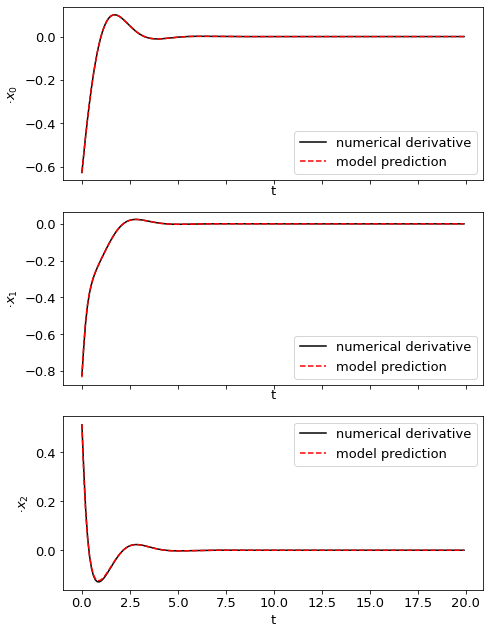

<Figure size 648x360 with 0 Axes>

In [3]:
GE = find_governing_equations(func = get_equation('cpa_3d_1'), bounds = bounds,
                                        dt= dt, t_end=t_end, dim = dim, n_traj = n_traj,  path = '.', verbose = verbose)
GE.create_time_series(multiple = True)
model, end_time = GE.find_equations(freq, deg, lamda, plot = True)

In [5]:
# def vf(x):
#     if type(x) != np.ndarray:
#         x = x.numpy()
#     return model.predict(x).T
# vf(np.array([[0.5, 1], [1.5, 5]]))

In [6]:
x, y = GE.create_time_series_MLP(dim)
train_dataset, validation_dataset = GE.process_MLP_inputs(x,y)
MLP_model, mlp_time = GE.find_equations_MLP(train_dataset, validation_dataset)

2022-08-23 18:34:28.488703: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


MLP training...
Epoch 1/50
6/6 [==============================] - 1s 50ms/step - loss: 0.0293 - mae: 0.0463 - val_loss: 0.0230 - val_mae: 0.0360
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0204 - mae: 0.0369 - val_loss: 0.0180 - val_mae: 0.0429
Epoch 3/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0163 - mae: 0.0344 - val_loss: 0.0141 - val_mae: 0.0157
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0141 - mae: 0.0238 - val_loss: 0.0131 - val_mae: 0.0217
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0128 - mae: 0.0212 - val_loss: 0.0122 - val_mae: 0.0214
Epoch 6/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0117 - mae: 0.0160 - val_loss: 0.0109 - val_mae: 0.0069
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0108 - mae: 0.0107 - val_loss: 0.0103 - val_mae: 0.0117
Epoch 8/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0100 - m

<Figure size 720x504 with 0 Axes>

In [7]:
results = GE.evaluate_models(vf, [10,10, 10])

<Figure size 1080x504 with 0 Axes>

In [8]:
results

(0.0, 0.0, 0.002367645766210079, 0.012109466445695837)

---- 40 ----- 10
Fitting model...
MLP training...
---- 40 ----- 20
Fitting model...


/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=2.25215e-23): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=2.25215e-23): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


MLP training...


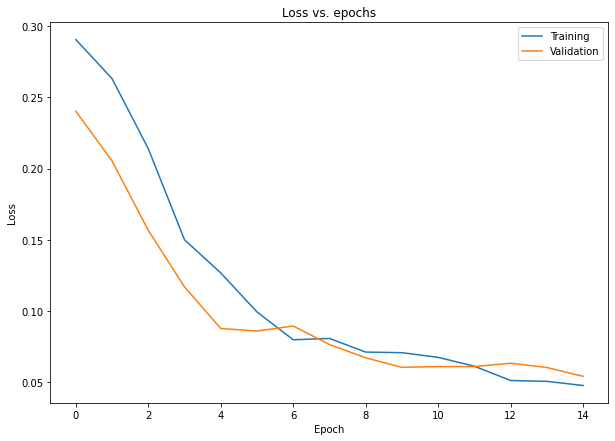

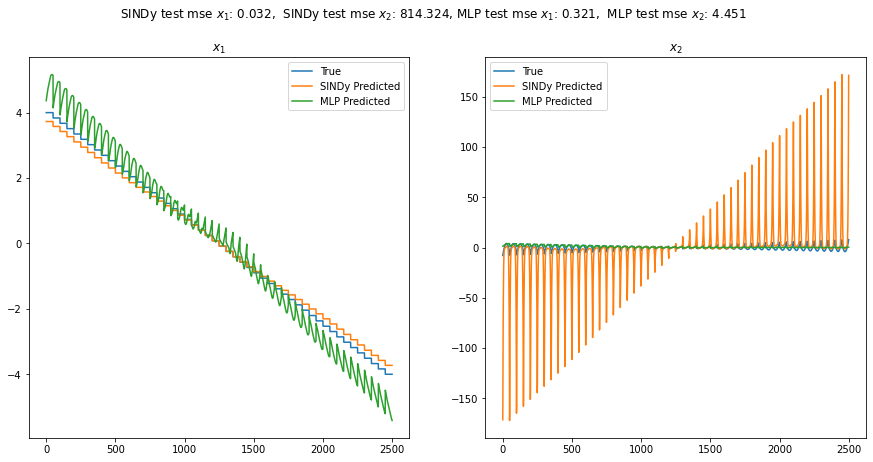

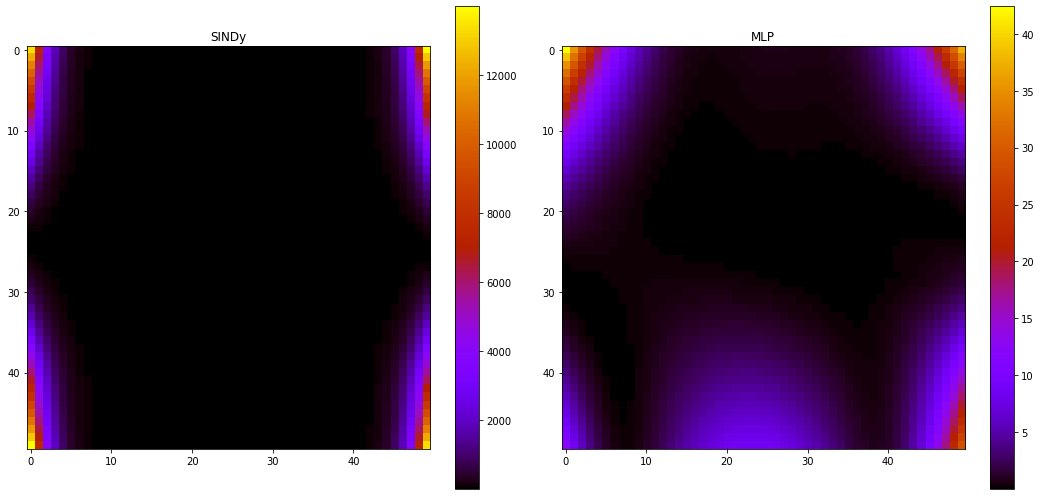

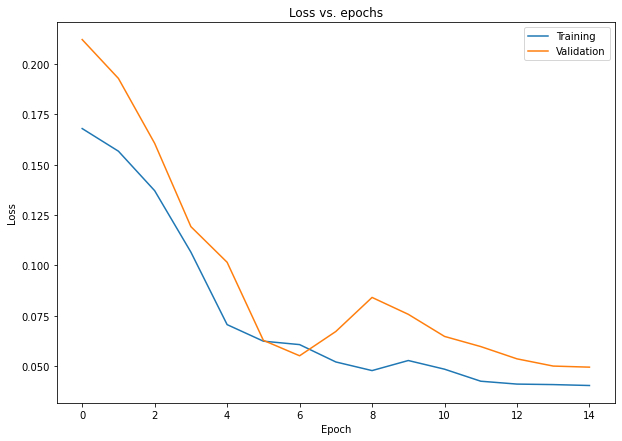

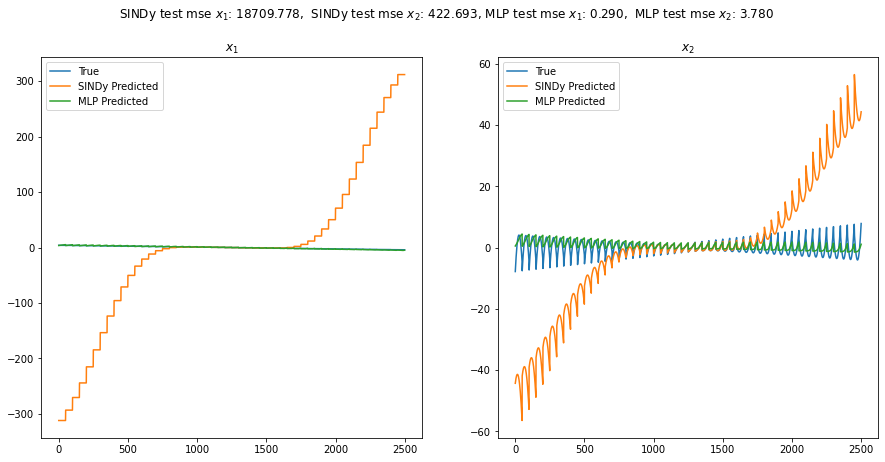

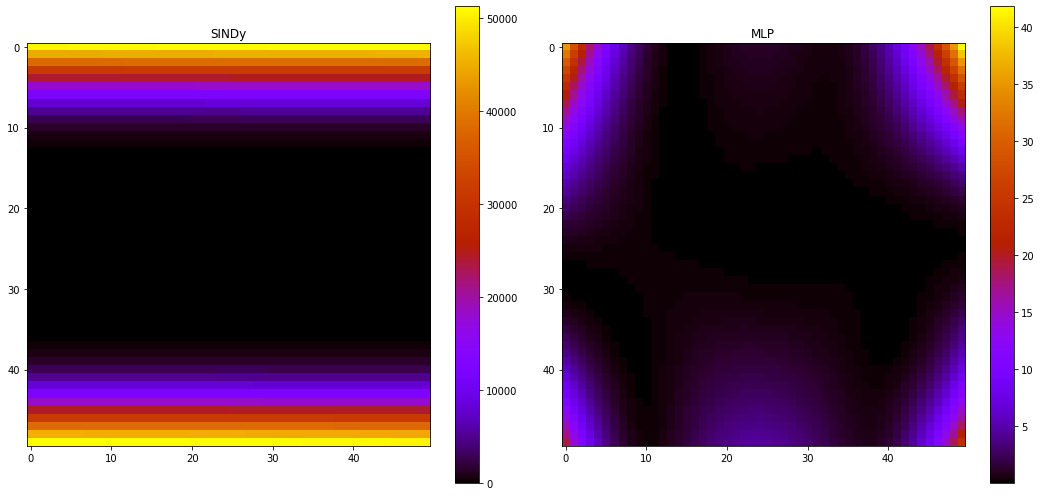

In [ ]:
runs = {'n': [], 'traj': [], 'mse_sindy_x1': [], 'mse_sindy_x2': [],'mse_mlp_x1': [],'mse_mlp_x2': [], 'time_S': [], 'time_M': []}
# for dt in  [0.01, 0.02, 0.04, 0.05, 0.1, 0.5]:
for dt in  [0.5]:
    # for traj in [10, 20, 50, 100, 500]:
    for traj in [10, 20]:
        n_points = np.arange(0, t_end, dt).shape[0]
        print('---- {} ----- {}'.format(n_points, traj))
        GE = find_governing_equations(func = get_equation('van_der_pool_1d'), bounds = bounds,
                                        dt= dt, t_end=t_end, dim = dim, n_traj = traj,  path = '.', verbose = False)
        GE.create_time_series(multiple = True)
        model, end_time = GE.find_equations(freq, deg, lamda, plot = False)
        x, y = GE.create_time_series_MLP(dim)
        train_dataset, validation_dataset = GE.process_MLP_inputs(x,y)
        MLP_model, mlp_end_time = GE.find_equations_MLP(train_dataset, validation_dataset)
        res = GE.evaluate_models(vf, [50,50])
        runs['n'].append(n_points)
        runs['traj'].append(traj)
        runs['mse_sindy_x1'].append(res[0])
        runs['mse_sindy_x2'].append(res[1])
        runs['mse_mlp_x1'].append(res[2])
        runs['mse_mlp_x2'].append(res[3])
        runs['time_S'].append(end_time)
        runs['time_M'].append(mlp_end_time)


In [ ]:
np.arange(0.01, 0.5, 5e-2)

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46])

In [ ]:
for dt in [0.01, 0.02, 0.04, 0.05, 0.1, 0.5]:
    print(np.arange(0, t_end, dt).shape[0])

2000
1000
500
400
200
40


In [ ]:
runs

{'n': [40, 40],
 'traj': [10, 20],
 'mse_sindy_x1': [0.03185752265185722, 18709.77798972344],
 'mse_sindy_x2': [814.3236137284085, 422.69252894375296],
 'mse_mlp_x1': [0.32085160841073934, 0.29000146239730207],
 'mse_mlp_x2': [4.450836510538068, 3.7799211282970915],
 'time_S': [1.55, 3.12],
 'time_M': [2.05, 1.93]}